In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.plotting_context(context='paper')
sns.set_palette('rainbow')

import pandas as pd

In [19]:
sales = pd.read_csv('../../../data/mckinsey/sales.csv', index_col='ID')

skus = pd.read_csv('../../../data/mckinsey/sku.csv', index_col='SKU')

sales = sales.join(skus, on='SKU')

In [23]:
sales.columns

Index(['geoCluster', 'SKU', 'date', 'price', 'sales', 'Category', 'Type',
       'brandId', 'lagerUnitQuantity', 'Units', 'trademark', 'countryOfOrigin',
       'Group'],
      dtype='object')

In [20]:
sales.describe()

,geoCluster,SKU,price,sales,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin
count,4.605985e+06,4.605985e+06,778366.000000,778366.000000,2.615209e+06,4.605985e+06,0.0,3.548272e+06,2.276373e+06
mean,2.220031e+03,3.671353e+05,67.490666,3.593748,3.663892e+03,1.156667e+02,NaN,6.290388e+03,7.333040e+00
std,2.459249e+02,3.005135e+05,85.631611,4.627158,2.626027e+03,1.602829e+02,NaN,4.434391e+03,1.009439e+01
min,9.200000e+01,2.400000e+01,0.000000,0.001000,9.670000e+02,5.000000e-01,NaN,2.970000e+02,1.000000e+00
25%,2.049000e+03,3.946500e+04,24.190000,1.000000,1.330000e+03,1.000000e+00,NaN,1.921000e+03,1.000000e+00
50%,2.158000e+03,3.637130e+05,38.490000,2.500000,2.737000e+03,1.500000e+00,NaN,5.070000e+03,1.000000e+00
75%,2.269000e+03,6.427000e+05,61.890000,4.000000,7.358000e+03,3.000000e+02,NaN,9.666000e+03,1.400000e+01
max,3.230000e+03,8.381370e+05,7246.890000,801.000000,8.314000e+03,5.500000e+02,NaN,1.515600e+04,3.700000e+01


In [3]:
sales['date'] = pd.to_datetime(sales['date'])

In [4]:
start_date = sales['date'].min()
end_date = sales['date'].max()
time_range = pd.date_range(start_date, end_date)

#### Number of observations per date

<AxesSubplot:>

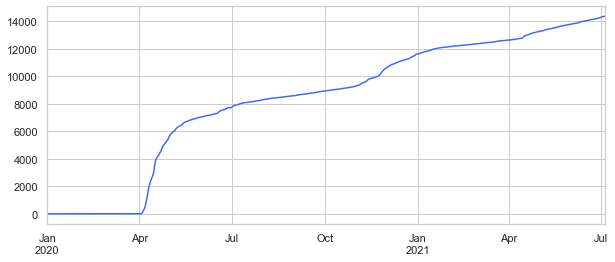

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
sales.groupby('date').count()['ID'].reindex(time_range, fill_value=0).plot(ax=ax)

#### Portion of NaN values per column

In [11]:
sales.isna().sum() / sales.shape[0]

ID            0.00000
geoCluster    0.00000
SKU           0.00000
date          0.00000
price         0.83101
sales         0.83101
dtype: float64

#### Number of observations per SKU

<AxesSubplot:xlabel='SKU'>

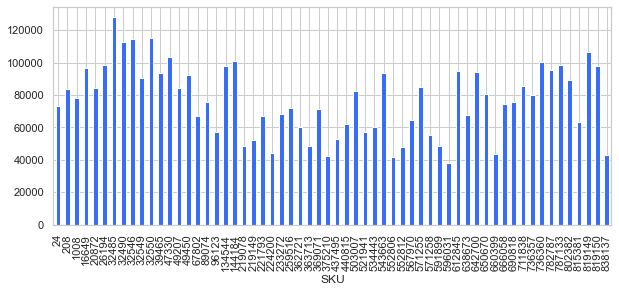

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))

sales.groupby('SKU')['date'].count().plot(ax=ax, kind='bar')

#### Number of summed sales per day and group

In [30]:
sales['sales'] = sales['sales'].fillna(1)

<AxesSubplot:xlabel='date'>

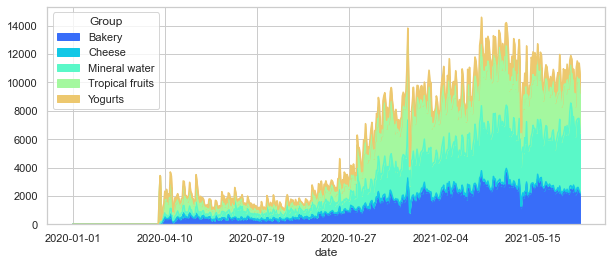

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))

sales.groupby(['date', 'Group']).sum()['sales'].unstack().plot(ax=ax, kind='area', stacked=True)